In [63]:
from tensorflow.keras.datasets import  cifar10
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

### <span style="color: #BFFF00;">Load and Visualize Dataset

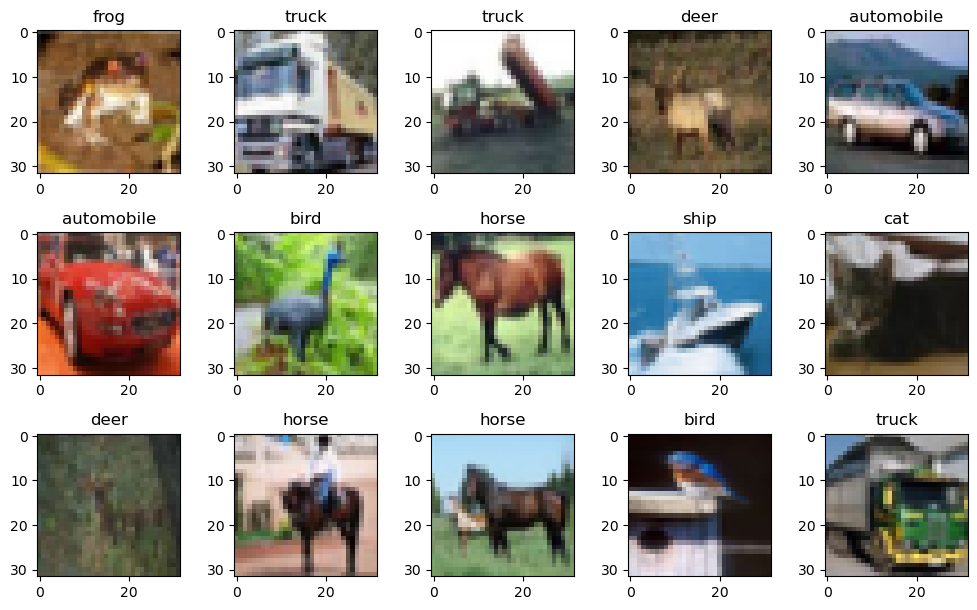

In [64]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))

# Loop through the first 15 images and display them in a 5x5 grid

for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()


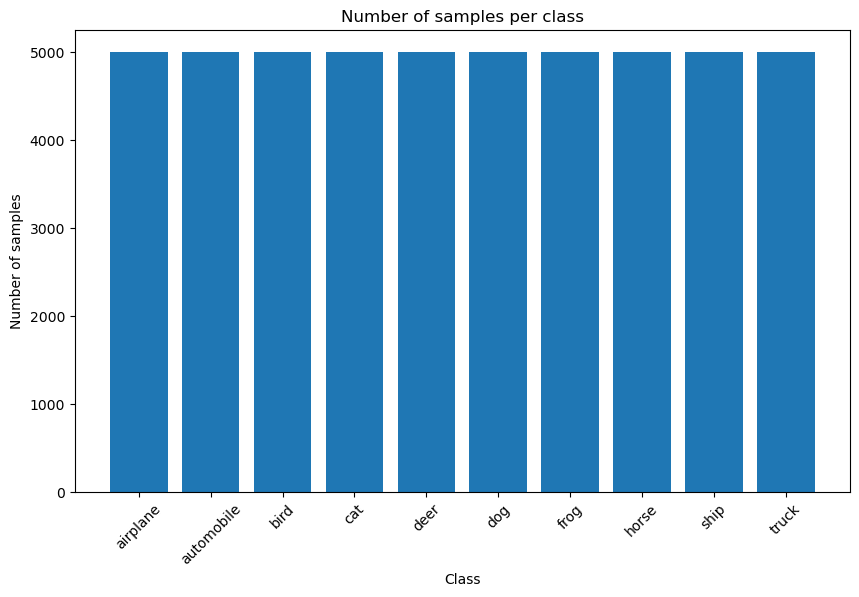

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [65]:
from collections import Counter

labels = y_train.flatten()

# Count the number of samples per class
class_counts = Counter(labels)

# Sort by class index
classes = sorted(class_counts.keys())
counts = [class_counts[c] for c in classes]


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Number of samples per class')
plt.xticks(rotation=45)
plt.show()

# Optional: print counts for reference
for cls, count in zip(class_names, counts):
    print(f"{cls}: {count}")


### <span style="color: #BFFF00;">Data Preprocessing

Before training, we need to prepare our data to fit the model:
1. **Reshape** the input images to add the channel dimension expected by CNNs.
2. **Normalize** pixel values to the [0, 1] range to speed up training.
3. **Encode** the labels using one-hot encoding for categorical classification.

We will use the `Rescaling` and `to_categorical` utilities provided by Keras.

In [66]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Rescaling

# Reshape to add channel dimension
# 3 channels since images are colored
X_train = tf.reshape(X_train, [-1, 32, 32, 3])
X_test = tf.reshape(X_test, [-1, 32, 32, 3])

# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Create a preprocessing layer for normalization
normalization_layer = Rescaling(1./255)
X_train = normalization_layer(X_train)
X_test = normalization_layer(X_test)

### <span style="color: #BFFF00;">Model Architecture

#### <span style="color: #00FFFF;"> Build CNN Model

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First convolutional layer with 32 filters, 3x3 kernel, ReLU activation
    # Input shape is 32x32 pixels with 3 color channels (RGB)
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    # Max pooling layer to reduce spatial dimensions by a factor of 2
    MaxPooling2D(2,2),
    # Second convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3,3), activation='relu'),
    # Another max pooling layer to reduce size further
    MaxPooling2D(2,2),
    # Flatten the 2D feature maps into a 1D vector for dense layers
    Flatten(),
    # Fully connected (dense) layer with 128 neurons and ReLU activation
    #Learns intermediate features from the previous layers
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (for 10 classes) and softmax activation
    #Produces the final probabilities for each class.
    Dense(10, activation='softmax')
])

c:\Users\naatt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

- **Layer Types:**
  - `Conv2D`: Convolutional layers that apply filters to the input image to detect features.
  - `MaxPooling2D`: Downsamples the spatial dimensions, reducing width and height.
  - `Flatten`: Converts the 2D feature maps into a 1D vector to feed into dense layers.
  - `Dense`: Fully connected layers that learn to classify based on extracted features.

- **Output Shape:**
  - The shape of the data after passing through each layer.
  - `None` means batch size can vary.
  - For example, `(None, 30, 30, 32)` means each image is transformed to 30x30 pixels with 32 feature maps.

- **Number of Parameters (Param #):**
  - These are the trainable weights and biases the model learns.
  - For example, the first Conv2D layer has 896 parameters (weights + biases).
  - Layers like MaxPooling have zero parameters because they perform fixed operations (like downsampling).

- **Total Parameters:**
  - The model has **315,722** trainable parameters in total.
  - This gives a sense of model complexity — more parameters often means a more powerful model but also higher risk of overfitting and longer training time.


### <span style="color: #BFFF00;">Model Training

In [69]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4670 - loss: 1.4848 - val_accuracy: 0.5804 - val_loss: 1.1914
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6078 - loss: 1.1150 - val_accuracy: 0.6321 - val_loss: 1.0575
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6590 - loss: 0.9746 - val_accuracy: 0.6554 - val_loss: 0.9976
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6967 - loss: 0.8684 - val_accuracy: 0.6513 - val_loss: 1.0045
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7275 - loss: 0.7782 - val_accuracy: 0.6689 - val_loss: 0.9717
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7565 - loss: 0.6968 - val_accuracy: 0.6809 - val_loss: 0.9511
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7815 - loss: 0.6223 - val_accuracy: 0.6980 - val_loss: 0.9197
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8029 - loss: 0.5564 - 

### <span style="color: #BFFF00;">Model Evaluation

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.6894
Precision: 0.6940
Recall: 0.6894
F1 Score: 0.6884


In [71]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.79      0.69      0.74      1000
  automobile       0.83      0.78      0.80      1000
        bird       0.59      0.58      0.59      1000
         cat       0.47      0.56      0.52      1000
        deer       0.62      0.65      0.63      1000
         dog       0.67      0.46      0.55      1000
        frog       0.71      0.81      0.76      1000
       horse       0.73      0.74      0.74      1000
        ship       0.76      0.85      0.80      1000
       truck       0.76      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



**Class-by-Class Insights**

| Class         | Precision | Recall | F1-score | Support | Interpretation |
|---------------|-----------|--------|----------|---------|----------------|
| **airplane** | 0.74      | 0.73   | 0.74     | 1000    | High precision, but the model sometimes misses actual airplanes 
| **automobile**     | 0.81      | 0.81   | 0.81     | 1000    | Excellent performance. The model is very good at detecting automobiles, though it sometimes confuses other objects with them. |
| **bird**    | 0.53     | 0.67   | 0.59     | 1000    | Very poor performance. The model struggles to identify birds and often confuses them with other classes. |
| **cat**       | 0.50      | 0.50   | 0.50     | 1000    | The worst performance. The model struggles to consistently identify cats. |
| **deer**        | 0.66      | 0.62   | 0.64     | 1000    | Average performance. The model has a decent balance between precision and the ability to detect deer. 
| **dog**      | 0.59      | 0.58   | 0.59     | 1000    | Weak performance. The model has low precision when classifying dogs and misses many of them. |
| **frog**       | 0.81     | 0.75   | 0.78     | 1000    | Very good and consistent performance. The model is highly accurate and detects frogs well. 
| **horse**     | 0.79      | 0.70   | 0.74     | 1000    | Solid and consistent performance. The model classifies horses well. |
| **ship**         | 0.83      | 0.78   | 0.81     | 1000    | Excellent performance. The model is very good at detecting most ships. |
| **truck**  | 0.76      | 0.80   | 0.78     | 1000    | Very good performance. The model consistently and accurately classifies trucks. |


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


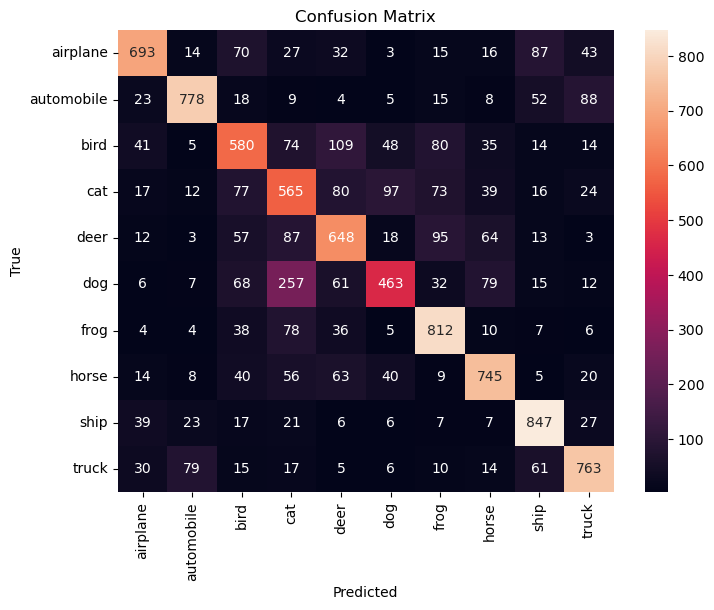

In [72]:

from sklearn.metrics import confusion_matrix

# Predict & confusion matrix
y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix reveals common misclassifications between visually similar classes:

* cat vs. dog: This is the most significant confusion. The model misclassifies 187 dogs as cats and 123 cats as dogs, indicating a major challenge in differentiating these two classes.

* automobile vs. truck: The model shows a clear tendency to mistake trucks for automobiles (76 times), while the opposite confusion is much lower (11 times).

* bird vs. deer: The model frequently confuses birds with deer (77 times), a notable misclassification that suggests an unexpected visual similarity in how the model interprets these two classes.

* frog vs. bird: There is a significant one-way confusion where frogs are often misclassified as birds (91 times), but not vice versa (7 times).

* airplane vs. bird: The model frequently mistakes birds for airplanes (82 times), while the opposite happens less often (24 times).

These confusions highlight the model's key weaknesses in differentiating between visually similar categories.

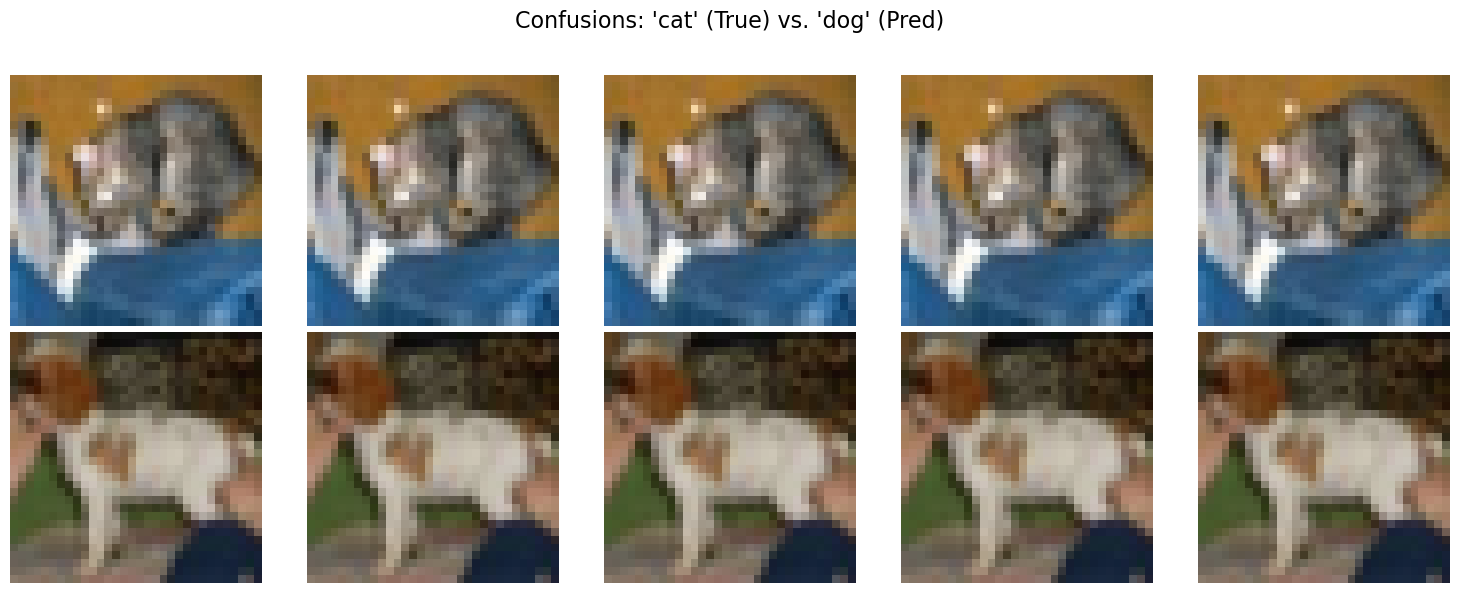

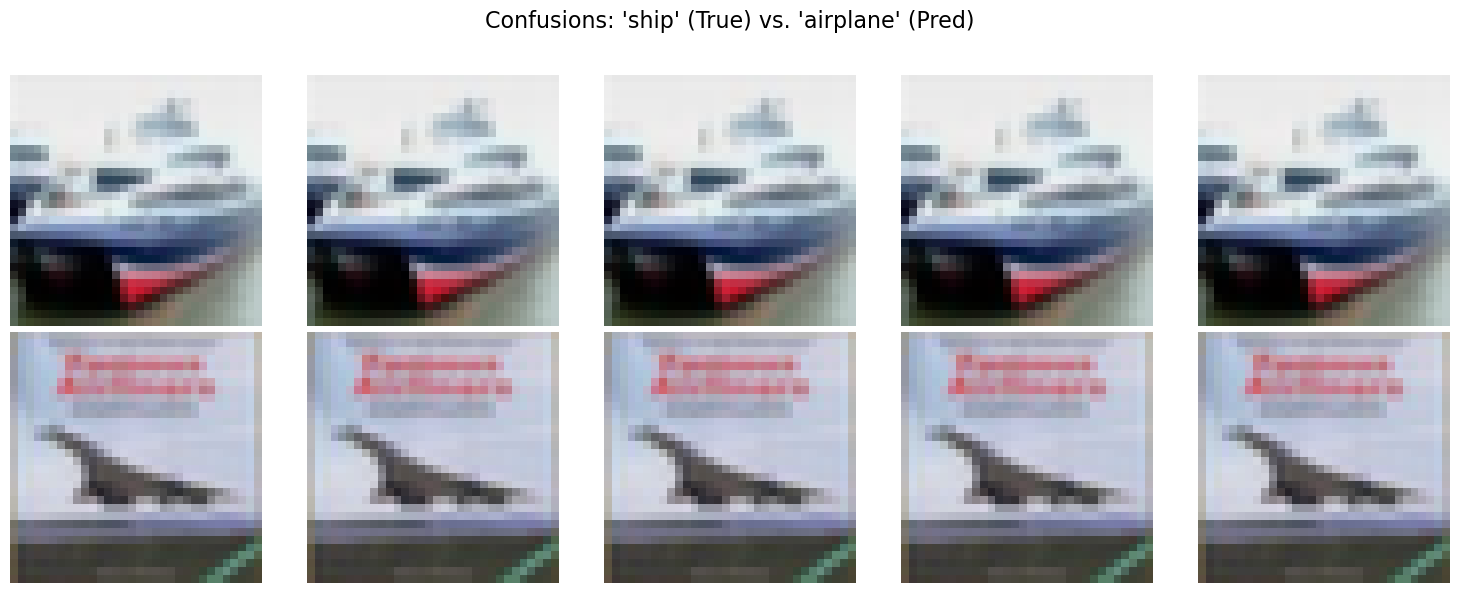

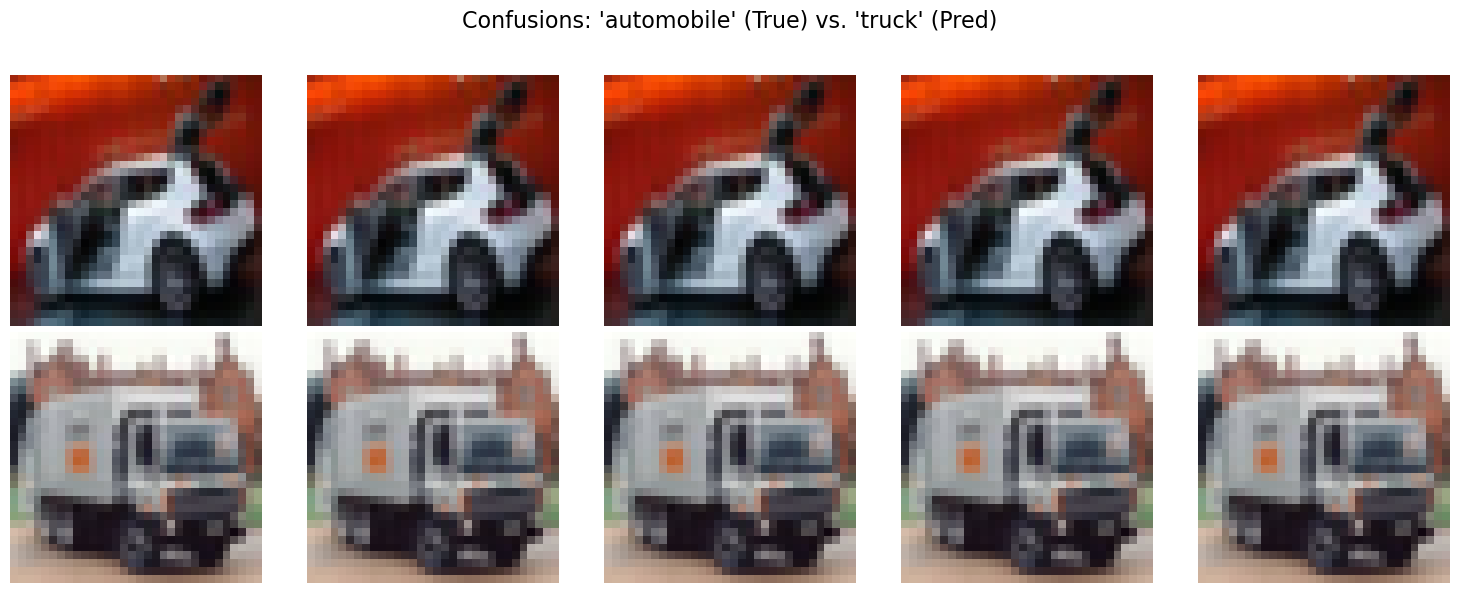

In [73]:
# Make sure y_pred and y_true are numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)
# Convert x_test to a NumPy array if it's a TensorFlow tensor
X_test_np = X_test.numpy() if hasattr(X_test, 'numpy') else X_test
# Confusing class pairs for CIFAR-10 to inspect
confusing_pairs = [
    (3, 5),  # cat vs dog
    (8, 0),  # ship vs airplane
    (1, 9)   # automobile vs truck
]
# Function to plot misclassified images
def show_confusion_examples(y_true, y_pred, X, class1, class2, n=5):
    # Find indices of misclassified images
    idx_confused_1 = np.where((y_true == class1) & (y_pred == class2))[0]
    idx_confused_2 = np.where((y_true == class2) & (y_pred == class1))[0]
    fig, axes = plt.subplots(2, n, figsize=(15, 6)) # Increased vertical size slightly
    fig.suptitle(f"Confusions: '{class_names[class1]}' (True) vs. '{class_names[class2]}' (Pred)", fontsize=16)
    # Plot examples for the first type of confusion
    axes[0, 0].set_ylabel(f"True: {class_names[class1]}\nPred: {class_names[class2]}", rotation=0, size='large', labelpad=60)
    for i in range(n):
        ax = axes[0, i]
        if i < len(idx_confused_1):
            # THE FIX: Remove .reshape() and cmap='gray' for color images
            ax.imshow(X[idx_confused_1[i]])
            ax.axis('off')
        else:
            ax.axis('off') # Hide unused subplots
    # Plot examples for the second type of confusion
    axes[1, 0].set_ylabel(f"True: {class_names[class2]}\nPred: {class_names[class1]}", rotation=0, size='large', labelpad=60)
    for i in range(n):
        ax = axes[1, i]
        if i < len(idx_confused_2):
            # THE FIX: Remove .reshape() and cmap='gray' for color images
            ax.imshow(X[idx_confused_2[i]])
            ax.axis('off')
        else:
            ax.axis('off') # Hide unused subplots
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap
    plt.show()
    
# Show misclassifications for each confusing pair
for class1, class2 in confusing_pairs:
    show_confusion_examples(y_true, y_pred, X_test_np, class1, class2)

### <span style="color: #BFFF00;">Improving the Model: More Layers and Data Augmentation

#### <span style="color: #00FFFF;">Adding More Layers to the CNN

Adding more convolutional layers and dense layers can help the model learn more complex features from the images. Deeper models can extract higher-level patterns, which often improves accuracy — but they may also increase training time and risk of overfitting if not carefully managed.

**Key points:**
- More convolutional layers let the network detect more detailed features.
- Additional dense layers can improve classification power.
- Use techniques like dropout or batch normalization to reduce overfitting.

In [74]:
# Define deeper CNN model
model_more_layers = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_more_layers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train on original data
history_more_layers = model_more_layers.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20


c:\Users\naatt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3828 - loss: 1.6740 - val_accuracy: 0.5090 - val_loss: 1.3293
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5387 - loss: 1.2862 - val_accuracy: 0.5926 - val_loss: 1.1382
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6083 - loss: 1.1156 - val_accuracy: 0.6314 - val_loss: 1.0339
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6502 - loss: 1.0026 - val_accuracy: 0.6675 - val_loss: 0.9619
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6761 - loss: 0.9248 - val_accuracy: 0.6626 - val_loss: 0.9563
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7009 - loss: 0.8534 - val_accuracy: 0.6872 - val_loss: 0.8884
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7176 - loss: 0.8085 - val_accuracy: 0.6952 - val_loss: 0.8776
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7350 - loss: 0.7558 - val_accuracy

In [75]:
# Evaluate
loss, accuracy = model_more_layers.evaluate(X_test, y_test)
print(f"Test accuracy with more layers: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7265 - loss: 0.9162
Test accuracy with more layers: 0.7265


In [76]:
# Predict class probabilities
y_pred_probs = model_more_layers.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.7265
Precision: 0.7358
Recall: 0.7265
F1 Score: 0.7287


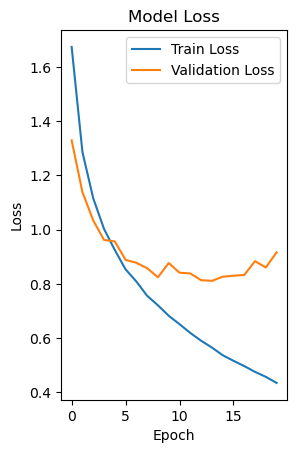

In [77]:
plt.subplot(1, 2, 2)
plt.plot(history_more_layers.history['loss'], label='Train Loss')
plt.plot(history_more_layers.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Interpretation: 
* Initial Learning (Epochs 0-2): Both training and validation loss decrease sharply, showing the model is learning quickly.

* Plateau (Epochs 3-6): The training loss continues to drop, but the validation loss flattens out, indicating a slowdown in the model's ability to generalize.

* Overfitting (Epochs 7-9): The training loss keeps falling, but the validation loss begins to rise. This is a clear sign of overfitting, where the model is memorizing the training data instead of learning to generalize to new data.

##### <span style="color: #00FFFF;">Adding More Layers to the CNN 2.0

In [78]:
# Convert the integer labels to a one-hot encoded format.
# This is required for the 'categorical_crossentropy' loss function.
# e.g., label '3' becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

model_more_layers2 = Sequential([
    # Added padding='same' to preserve dimensions after convolution
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_more_layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the one-hot encoded labels
history_more_layers2 = model_more_layers.fit(X_train, y_train_one_hot, 
                                            epochs=20, 
                                            batch_size=64, 
                                            validation_data=(X_test, y_test_one_hot))

Epoch 1/20


c:\Users\naatt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - accuracy: 0.8470 - loss: 0.4266 - val_accuracy: 0.7316 - val_loss: 0.9186
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8538 - loss: 0.4085 - val_accuracy: 0.7288 - val_loss: 0.9619
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8591 - loss: 0.3941 - val_accuracy: 0.7278 - val_loss: 0.9747
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8626 - loss: 0.3821 - val_accuracy: 0.7281 - val_loss: 0.9548
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8650 - loss: 0.3731 - val_accuracy: 0.7279 - val_loss: 0.9931
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8722 - loss: 0.3587 - val_accuracy: 0.7263 - val_loss: 1.0069
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8732 - loss: 0.3468 - val_accuracy: 0.7294 - val_loss: 1.0646
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8798 - loss: 0.3388 - val_accurac

In [79]:
# Evaluate the model using the one-hot encoded labels
loss, accuracy = model_more_layers.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy with more layers: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7267 - loss: 1.3195
Test accuracy with more layers: 0.7267


In [80]:
# Predict class probabilities
y_pred_probs = model_more_layers2.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1 Score: 0.0182


c:\Users\naatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


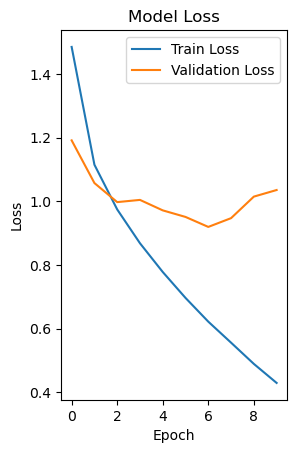

In [81]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

##### <span style="color: #00FFFF;">Adding Regularizer

In [82]:
from tensorflow.keras import regularizers

In [83]:
# Convert the integer labels to a one-hot encoded format.
# This is required for the 'categorical_crossentropy' loss function.
# e.g., label '3' becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

wd = 1e-4

model_more_layers3 = Sequential([
    # Added padding='same' to preserve dimensions after convolution
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3),kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_more_layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the one-hot encoded labels
history_more_layers3 = model_more_layers.fit(X_train, y_train_one_hot, 
                                            epochs=20, 
                                            batch_size=64, 
                                            validation_data=(X_test, y_test_one_hot))

Epoch 1/20


c:\Users\naatt\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9051 - loss: 0.2596 - val_accuracy: 0.7268 - val_loss: 1.2949
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9096 - loss: 0.2499 - val_accuracy: 0.7294 - val_loss: 1.3326
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9091 - loss: 0.2472 - val_accuracy: 0.7259 - val_loss: 1.3623
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9096 - loss: 0.2483 - val_accuracy: 0.7249 - val_loss: 1.4071
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9112 - loss: 0.2429 - val_accuracy: 0.7227 - val_loss: 1.3556
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9157 - loss: 0.2309 - val_accuracy: 0.7326 - val_loss: 1.3890
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9161 - loss: 0.2328 - val_accuracy: 0.7199 - val_loss: 1.3978
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9148 - loss: 0.2368 - val_accurac

In [84]:
# Evaluate the model using the one-hot encoded labels
loss, accuracy = model_more_layers.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy with more layers: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7164 - loss: 1.6481
Test accuracy with more layers: 0.7164


In [85]:
# Predict class probabilities
y_pred_probs = model_more_layers3.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Accuracy: 0.0742
Precision: 0.0135
Recall: 0.0742
F1 Score: 0.0223


c:\Users\naatt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


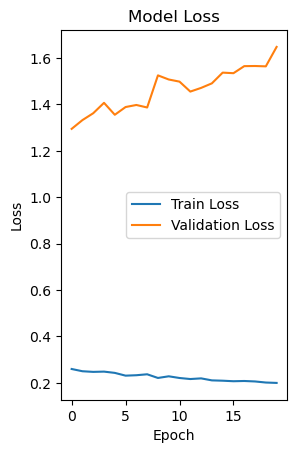

In [86]:
plt.subplot(1, 2, 2)
plt.plot(history_more_layers3.history['loss'], label='Train Loss')
plt.plot(history_more_layers3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### <span style="color: #00FFFF;">Hyperparameters tuning - Early Stopping

##### What is Early Stopping?

Early stopping is a technique used to prevent overfitting during training by monitoring the model’s performance on a validation set. Instead of training for a fixed number of epochs, the training stops automatically when the model's validation loss stops improving for a specified number of consecutive epochs (called "patience").

**Why use early stopping?**

- Prevents the model from overfitting by stopping before the model starts to memorize training data.
- Saves training time by stopping when further improvement is unlikely.
- Helps find the optimal number of epochs without manual tuning.

In [87]:
from tensorflow.keras.callbacks import EarlyStopping

model_more_layers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Setup EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # metric to monitor
    patience=3,           # stop if no improvement after 3 epochs
    restore_best_weights=True
)

# Train the model with early stopping
history = model_more_layers.fit(
    X_train, y_train,
    epochs=60,             # large max epochs, training will stop early if needed
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9267 - loss: 0.2033 - val_accuracy: 0.7258 - val_loss: 1.6148
Epoch 2/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9304 - loss: 0.1964 - val_accuracy: 0.7163 - val_loss: 1.6880
Epoch 3/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9303 - loss: 0.1931 - val_accuracy: 0.7214 - val_loss: 1.7017
Epoch 4/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9296 - loss: 0.1921 - val_accuracy: 0.7247 - val_loss: 1.6665


In [88]:
# Evaluate the model
loss, accuracy = model_more_layers.evaluate(X_test, y_test)
print(f"Test accuracy with early stopping: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7258 - loss: 1.6148
Test accuracy with early stopping: 0.7258


#### <span style="color: #00FFFF;">Data Augmentation

Data augmentation artificially increases the size and diversity of the training dataset by applying random transformations such as rotations, flips, zooms, and shifts. This helps the model generalize better and reduces overfitting, often leading to improved accuracy.

**Key points:**
- Augmented data simulates variations the model might see in real-world inputs.
- Keras provides an easy way to apply data augmentation on the fly during training.
- Common augmentations include rotation, width/height shift, zoom, and horizontal flip.

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [90]:
# Setup data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Train model using data augmentation
history_aug = model_more_layers.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20


c:\Users\naatt\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6216 - loss: 1.1392 - val_accuracy: 0.6909 - val_loss: 0.9397
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6514 - loss: 1.0324 - val_accuracy: 0.6911 - val_loss: 0.9550
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6651 - loss: 0.9905 - val_accuracy: 0.7161 - val_loss: 0.8522
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6777 - loss: 0.9432 - val_accuracy: 0.7189 - val_loss: 0.8486
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6854 - loss: 0.9228 - val_accuracy: 0.7274 - val_loss: 0.8222
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6902 - loss: 0.9065 - val_accuracy: 0.7124 - val_loss: 0.8620
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6981 - loss: 0.8825 - val_accuracy: 0.7249 - val_loss: 0.8183
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7021 - loss: 0.8666 - val_accurac

In [91]:
# Evaluate
loss_aug, accuracy_aug = model_more_layers.evaluate(X_test, y_test)
print(f"Test accuracy with data augmentation: {accuracy_aug:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7508 - loss: 0.7630
Test accuracy with data augmentation: 0.7508


### <span style="color: #BFFF00;">Transfer Learning

#### <span style="color: #00FFFF;">Import Libraries

In [92]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

#### <span style="color: #00FFFF;">Load the Preprocess Data

In [93]:
# Load CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [94]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# Build TensorFlow datasets
batch_size = 64

def preprocess(image, label):
    image = tf.image.resize(image, (96, 96))       # resize here
    image = preprocess_input(image)                # mobilenet preprocess
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_cat))
train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test_cat))
test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

#### <span style="color: #FFD1DC;">MobileNetV2 1.0

##### <span style="color: #FFE5B4;">1. Load the Pre-trained Model

- Load the MobileNetV2 base model with pretrained ImageNet weights
- Set include_top=False to exclude the final classification layers
- Freeze the entire base model initially to train only the new top layers first

In [95]:
# Build transfer learning model
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

##### <span style="color: #FFE5B4;">2. Add a Custom Classifier on Top

In [96]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(), # Pool spatial features into a vector
    layers.Dense(128, activation='relu'), # Fully connected layer to learn new patterns
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (Fashion MNIST)
])

##### <span style="color: #FFE5B4;">3. Compile the Model

In [97]:
# Compile model
# Compile the model with Adam optimizer and categorical crossentropy loss

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### <span style="color: #FFE5B4;">4. Train the Model

In [98]:
# Train
history = model.fit(train_ds, epochs=5, batch_size=64)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 263s 328ms/step - accuracy: 0.8279 - loss: 0.5074
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 239s 305ms/step - accuracy: 0.8748 - loss: 0.3592
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 299s 382ms/step - accuracy: 0.8941 - loss: 0.3044
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 237s 302ms/step - accuracy: 0.9095 - loss: 0.2585
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 238s 304ms/step - accuracy: 0.9229 - loss: 0.2175


##### <span style="color: #FFE5B4;">5. Evaluate the model

In [99]:
# Evaluate
test_loss, test_acc = model.evaluate(test_ds)
print(f" Test accuracy: {test_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.8607 - loss: 0.4226
 Test accuracy: 0.8607


In [100]:
# Predictions
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step


In [101]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_pred_probs = model.predict(test_ds)                     # probabilities
y_pred = np.argmax(y_pred_probs, axis=1)                  # predicted labels

# Get true labels from the dataset
y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in test_ds], axis=0)

# Classification report
print(classification_report(y_true, y_pred, digits=4))

157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step
              precision    recall  f1-score   support

           0     0.8571    0.9000    0.8780      1000
           1     0.9291    0.9300    0.9295      1000
           2     0.7939    0.8820    0.8356      1000
           3     0.7753    0.6830    0.7262      1000
           4     0.8453    0.8250    0.8350      1000
           5     0.7586    0.8390    0.7968      1000
           6     0.8916    0.8720    0.8817      1000
           7     0.9210    0.8510    0.8846      1000
           8     0.9356    0.9000    0.9174      1000
           9     0.9149    0.9250    0.9199      1000

    accuracy                         0.8607     10000
   macro avg     0.8622    0.8607    0.8605     10000
weighted avg     0.8622    0.8607    0.8605     10000



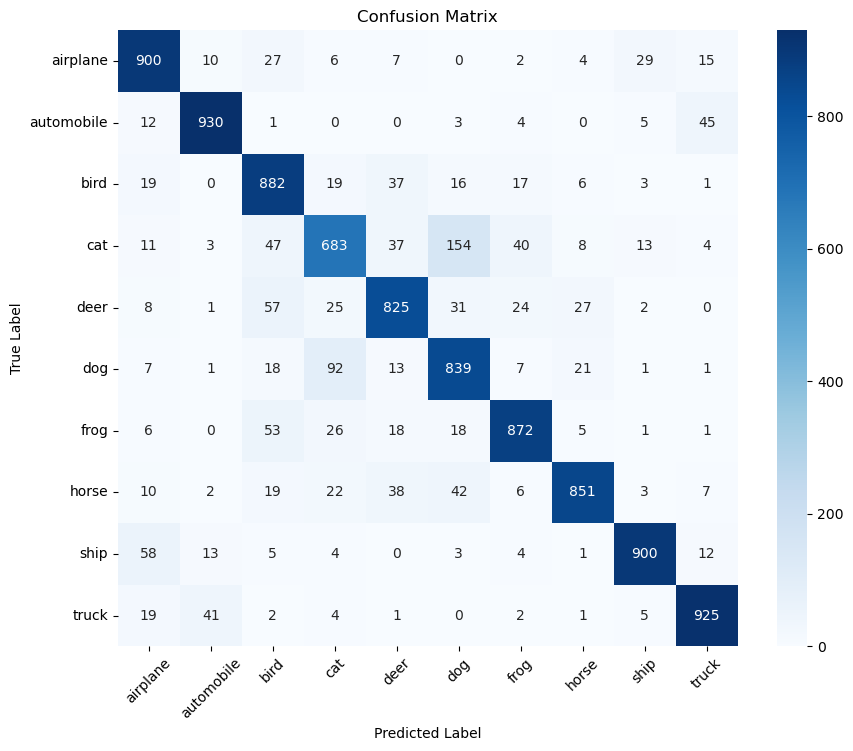

In [102]:
cm = confusion_matrix(y_true,y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#### <span style="color: #FFD1DC;">MobileNetV2 2.0

In [103]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

##### <span style="color: #FFE5B4;">1. Load the Pre-trained Model

In [104]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(96,96,3))
base_model.trainable = False  # Freeze base for transfer learning

##### <span style="color: #FFE5B4;">2. Add a Custom Classifier on Top

In [105]:
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  # regularization
output = Dense(10, activation="softmax")(x)  # CIFAR-10 has 10 classes
model = Model(inputs=base_model.input, outputs=output)

##### <span style="color: #FFE5B4;">3. Compile the Model

In [106]:
# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"])

##### <span style="color: #FFE5B4;">4. Train the Model

In [107]:
# Train first phase (frozen base)
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 295s 370ms/step - accuracy: 0.5444 - loss: 1.4097 - val_accuracy: 0.7842 - val_loss: 0.6683
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 249s 318ms/step - accuracy: 0.7572 - loss: 0.7257 - val_accuracy: 0.8173 - val_loss: 0.5393
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 233s 297ms/step - accuracy: 0.7915 - loss: 0.6132 - val_accuracy: 0.8307 - val_loss: 0.4937
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 218s 279ms/step - accuracy: 0.8101 - loss: 0.5554 - val_accuracy: 0.8388 - val_loss: 0.4645
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 253s 323ms/step - accuracy: 0.8202 - loss: 0.5240 - val_accuracy: 0.8446 - val_loss: 0.4474
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 321s 410ms/step - accuracy: 0.8294 - loss: 0.5002 - val_accuracy: 0.8473 - val_loss: 0.4376
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 254s 324ms/step - accuracy: 0.8335 - loss: 0.4822 - val_accuracy: 0.8518 - val_loss: 0.4287
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 333s 426ms/step - accuracy: 0.8405 -

##### <span style="color: #FFE5B4;">5. Evaluate the model

In [108]:
# Evaluate the model
loss, accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.8548 - loss: 0.4125
Test accuracy: 0.8548


In [109]:
# Predictions
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step


In [110]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_pred_probs = model.predict(test_ds)                     # probabilities
y_pred = np.argmax(y_pred_probs, axis=1)                  # predicted labels

# Get true labels from the dataset
y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in test_ds], axis=0)

# Classification report
print(classification_report(y_true, y_pred, digits=4))

157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step
              precision    recall  f1-score   support

           0     0.8724    0.8550    0.8636      1000
           1     0.9236    0.9310    0.9273      1000
           2     0.7905    0.8340    0.8117      1000
           3     0.7421    0.7280    0.7350      1000
           4     0.8202    0.8300    0.8250      1000
           5     0.8239    0.7860    0.8045      1000
           6     0.8776    0.8890    0.8833      1000
           7     0.8782    0.8580    0.8680      1000
           8     0.8993    0.9290    0.9139      1000
           9     0.9200    0.9080    0.9139      1000

    accuracy                         0.8548     10000
   macro avg     0.8548    0.8548    0.8546     10000
weighted avg     0.8548    0.8548    0.8546     10000



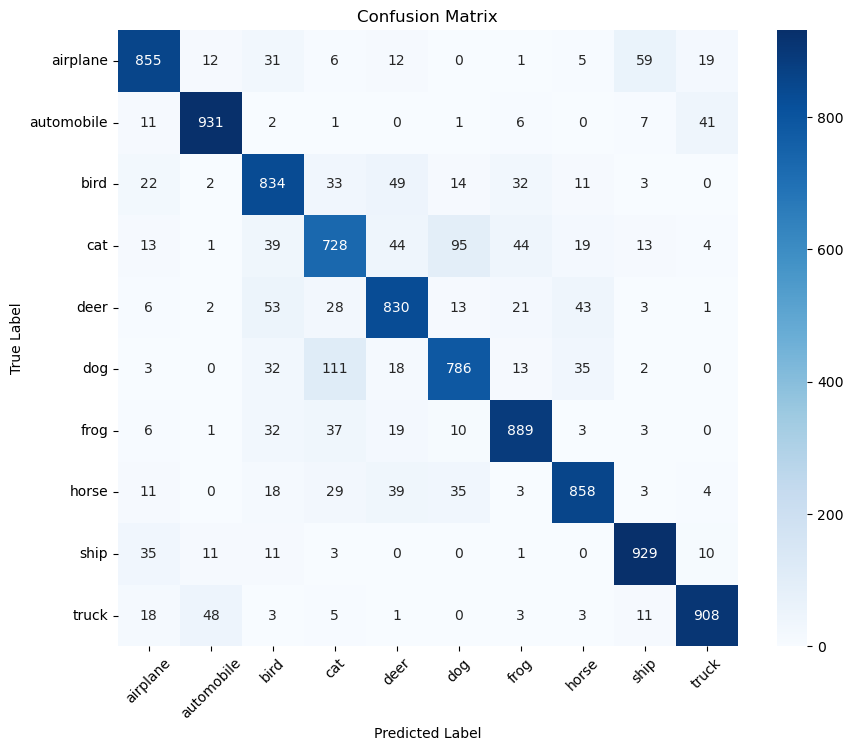

In [111]:
cm = confusion_matrix(y_true,y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#### <span style="color: #FFD1DC;">MobileNetV2 3.0

In [112]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

##### <span style="color: #FFE5B4;">1. Load the Pre-trained Model

In [113]:
# Load base MobileNetV2 (pretrained on ImageNet, exclude top)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(96,96,3))
base_model.trainable = False  # Freeze base for transfer learning

##### <span style="color: #FFE5B4;">2. Add a Custom Classifier on Top

In [114]:
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  # regularization
output = Dense(10, activation="softmax")(x)  # CIFAR-10 has 10 classes
model = Model(inputs=base_model.input, outputs=output)

##### <span style="color: #FFE5B4;">3. Compile the Model

In [115]:
# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

##### <span style="color: #FFE5B4;">4. Train the Model

In [116]:
# Train first phase (frozen base)
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    batch_size=64
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 311s 390ms/step - accuracy: 0.5346 - loss: 1.4427 - val_accuracy: 0.7759 - val_loss: 0.6752
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 334s 426ms/step - accuracy: 0.7538 - loss: 0.7294 - val_accuracy: 0.8139 - val_loss: 0.5394
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 323s 413ms/step - accuracy: 0.7912 - loss: 0.6175 - val_accuracy: 0.8298 - val_loss: 0.4901
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 371s 398ms/step - accuracy: 0.8087 - loss: 0.5559 - val_accuracy: 0.8383 - val_loss: 0.4652
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 349s 445ms/step - accuracy: 0.8204 - loss: 0.5220 - val_accuracy: 0.8426 - val_loss: 0.4476
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 302s 385ms/step - accuracy: 0.8300 - loss: 0.4962 - val_accuracy: 0.8456 - val_loss: 0.4355
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 371s 474ms/step - accuracy: 0.8347 - loss: 0.4801 - val_accuracy: 0.8475 - val_loss: 0.4276
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 392s 487ms/step - accuracy: 0.8402 -

##### <span style="color: #FFE5B4;">5. Evaluate the model

In [117]:
# Evaluate the model
loss, accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 155ms/step - accuracy: 0.8543 - loss: 0.4111
Test accuracy: 0.8543


In [118]:
# Predictions
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 154ms/step


In [119]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_pred_probs = model.predict(test_ds)                     # probabilities
y_pred = np.argmax(y_pred_probs, axis=1)                  # predicted labels

# Get true labels from the dataset
y_true = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in test_ds], axis=0)

# Classification report
print(classification_report(y_true, y_pred, digits=4))

157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step
              precision    recall  f1-score   support

           0     0.8627    0.8670    0.8648      1000
           1     0.9290    0.9160    0.9225      1000
           2     0.8697    0.7740    0.8190      1000
           3     0.7291    0.7400    0.7345      1000
           4     0.8023    0.8480    0.8245      1000
           5     0.8095    0.7820    0.7955      1000
           6     0.8685    0.8920    0.8801      1000
           7     0.8690    0.8820    0.8754      1000
           8     0.9005    0.9230    0.9116      1000
           9     0.9063    0.9190    0.9126      1000

    accuracy                         0.8543     10000
   macro avg     0.8547    0.8543    0.8541     10000
weighted avg     0.8547    0.8543    0.8541     10000



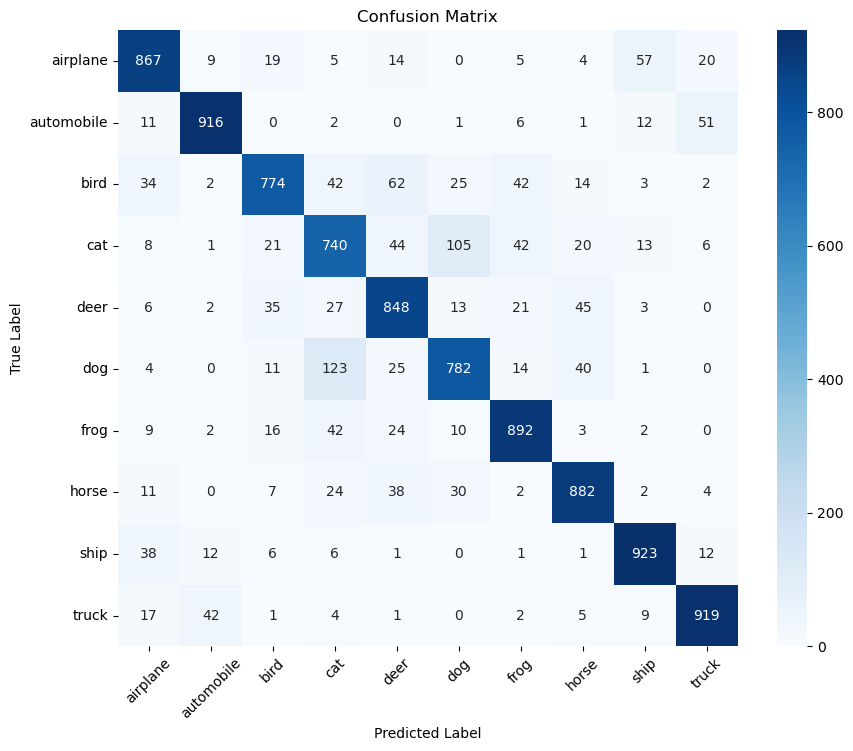

In [120]:
cm = confusion_matrix(y_true,y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()